In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate

In [36]:
# Set plot params
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Numerical Interpolation / TDMA

Interpolation vs. Regression  
data를 이용해서 반드시 그 점을 통과(Interpolation - fitting을 위해) 주변을 지나가거나(Regression - trend보기)  
data를 기준으로 사물을 보느냐, 멀리서 그 data의 추세를 보느냐  

Interpolation 을 하기위한 data의특징 : 1-1대응  
한점에 여러개 data가 쌓이면 --> regression : 추세를 보자  

In [12]:
# Lagrange Interpolation
def Lagrange(x, y, xval):
    yval = 0

    deg = len(x) - 1

    for i in range(deg+1):
        LagBase = 1.
        for k in range(deg+1):
            if (k != i):
                LagBase *= (xval - x[k])/(x[i] - x[k])
        yval += y[i]*LagBase
    return yval


In [28]:
x = np.array([1, 1.5, 2, 2.5, 3, 4, 5])
y = np.array([0, 1.5, 2, 2,   1, 1, 3])

In [29]:
xa = np.linspace(0.9, 5.1, 100)
ya = Lagrange(x, y, xa)

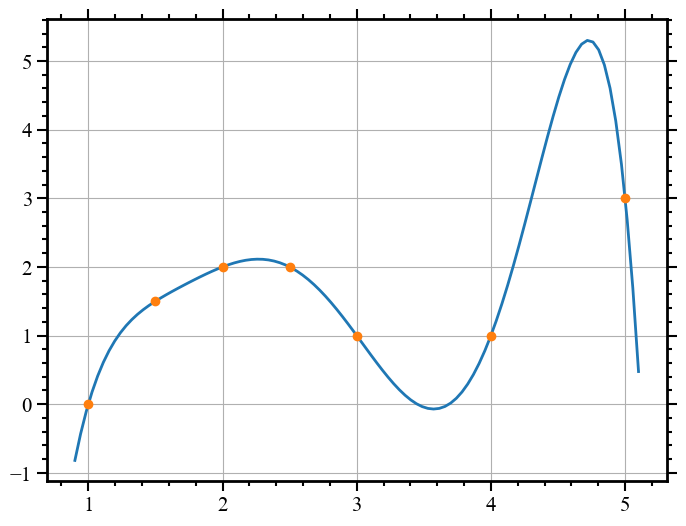

In [40]:
plt.plot(xa,ya)
plt.plot(x,y,'o')
plt.grid()

### Discussion

Interpolation 결과가 data의 max보다 더 큰 max를 찍고 있어서, 이상하다는 생각이 들 수 있다.  
Low bound, Upper bound가 중요할 수 있음

Lagrange는 특히 이런 그림이 잘 나옴 (when, 데이터가 너무 많으면 특히나 더!!!!! --> 이게 단점이다)

Basis function을 따로 만드는게 더 좋다.

Lagrange basis : cardinal function

In [31]:
LagPoly = interpolate.lagrange(x,y)
print(LagPoly)

         6         5         4         3         2
-0.2429 x + 3.933 x - 25.12 x + 81.25 x - 141.8 x + 128.8 x - 46.86


In [32]:
xaSci = np.linspace(0.9, 5.1, 100)
yaSci = LagPoly(xaSci)

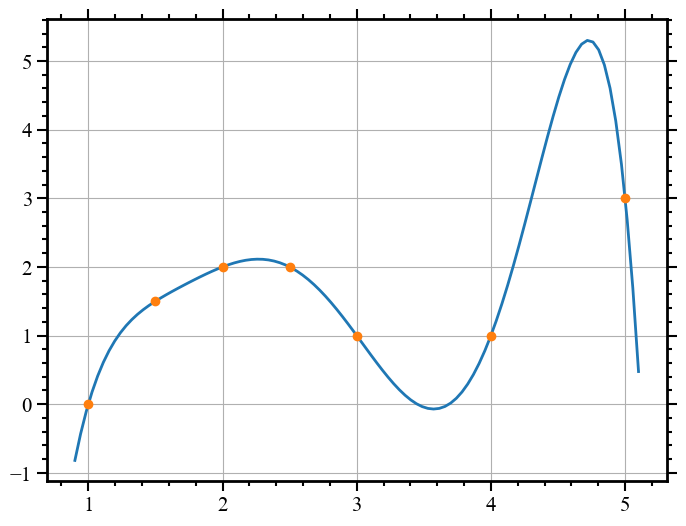

In [43]:
plt.plot(xaSci,yaSci)
plt.plot(x,y,'o')
plt.grid()

### Bivariate functions

2 variable function 일 때, x 에 대한 lagrange basis, y에 대한 lagrange basis 따로 구해서 곱해도 된다!  
인수분해 같은 개념이랄까..?

In [44]:
# Bivariate Lagrange Interpolation
def Lagrange2(x, y, z, xval, yval):
    zval = 0

    deg = len(x) - 1

    for i in range(deg+1):
        LagBase_x = 1.
        LagBase_y = 1.
        for k in range(deg+1):
            if (k != i):
                LagBase_x *= (xval - x[k])/(x[i] - x[k])
                LagBase_y *= (yval - y[k])/(y[i] - y[k])
        zval += z[i]*LagBase_x*LagBase_y
    return zval
